In [2]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

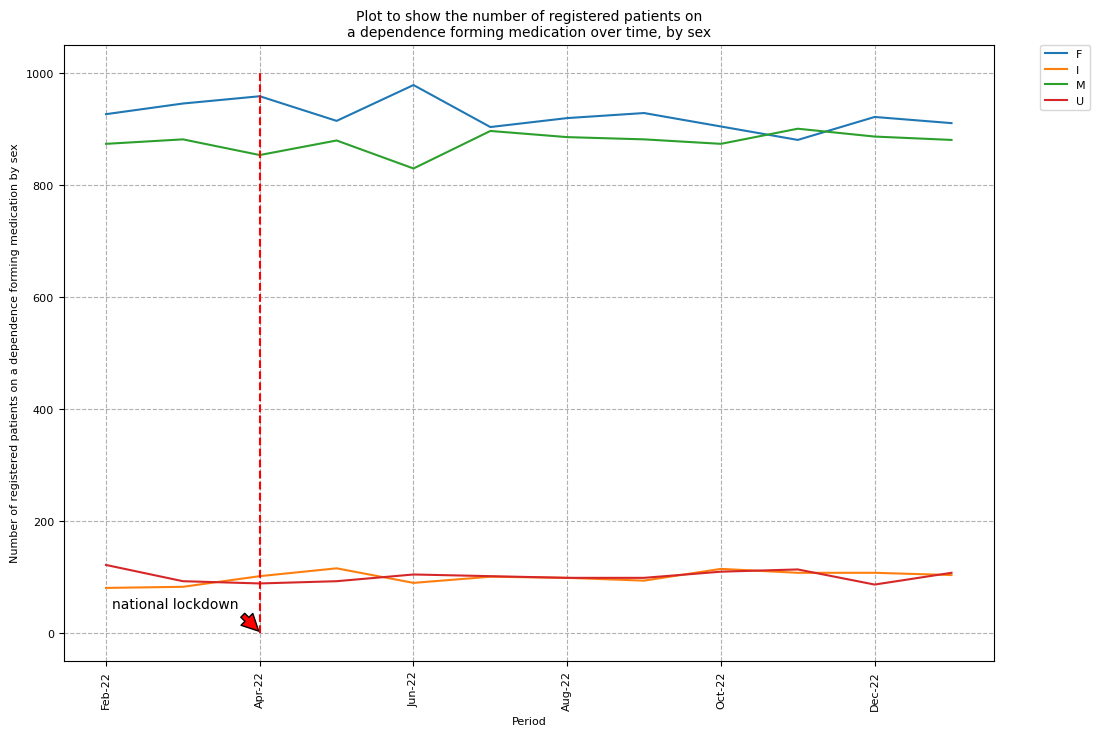

In [3]:
data_measure_dfm_medications_sex_rate = pd.read_csv("../output/measure_dfm_medications_by_sex_rate.csv", parse_dates=["date"])
df_measure_dfm_medications_sex_rate = pd.DataFrame.pivot(data_measure_dfm_medications_sex_rate, index='date', columns='sex', values='research_population')
df_measure_dfm_medications_sex_rate.index = pd.to_datetime(df_measure_dfm_medications_sex_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_sex_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by sex', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=1000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by sex'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_sex_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [4]:
print(tabulate(df_measure_dfm_medications_sex_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_sex_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      F    I    M    U
------  ---  ---  ---  ---
Feb-22  926   80  873  121
date      F    I    M    U
------  ---  ---  ---  ---
Jan-23  910  103  880  107


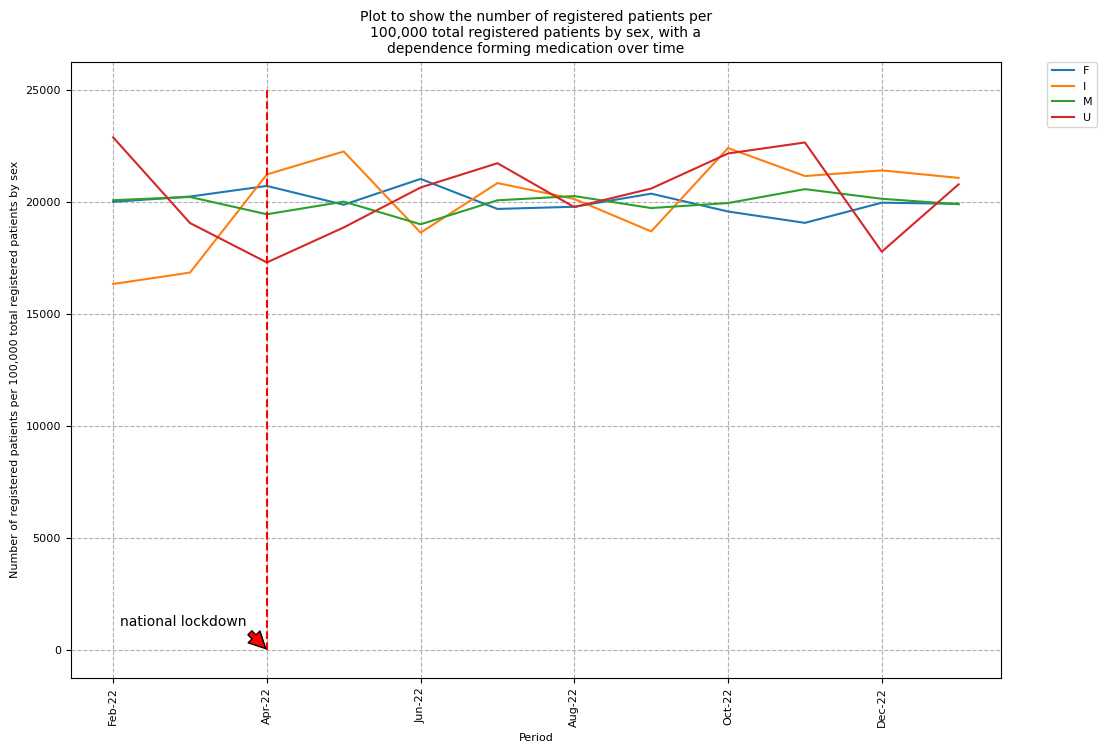

In [5]:
df_temp = pd.DataFrame(data_measure_dfm_medications_sex_rate)
df_sex_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_sex_research_population = pd.DataFrame.pivot(df_sex_research_population, index='date', columns='sex', values='weighted_research_population')
df_sex_research_population.index = pd.to_datetime(df_sex_research_population.index).strftime('%b-%y')
ax = df_sex_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by sex', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by sex, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_sex_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [6]:
print(tabulate(df_sex_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_sex_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date          F        I      M        U
------  -------  -------  -----  -------
Feb-22  19995.7  16326.5  20069  22873.3
date          F        I      M        U
------  -------  -------  -----  -------
Jan-23  19908.1  21063.4  19887  20776.7


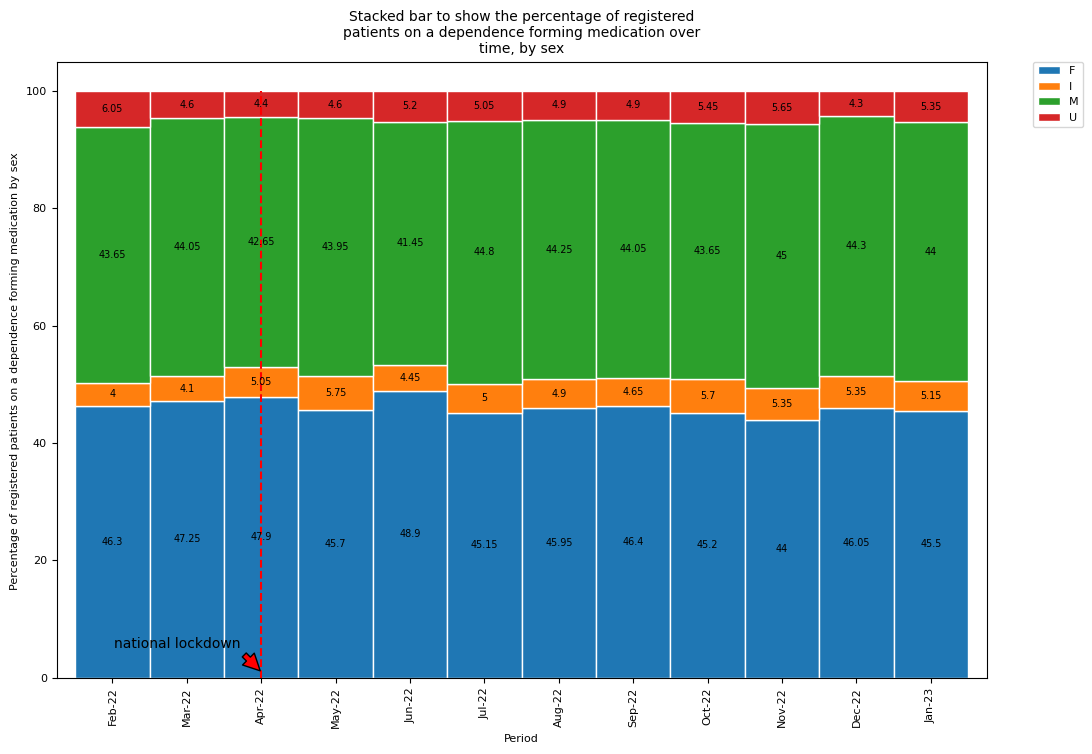

In [7]:
df_sex_stacked = pd.DataFrame(df_measure_dfm_medications_sex_rate)
df_sex_stacked.head()
tot = df_sex_stacked.sum(axis=1)
per = df_sex_stacked.div(tot, axis=0).mul(100).round(2)
ax = per.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by sex ', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by sex'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_sex_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

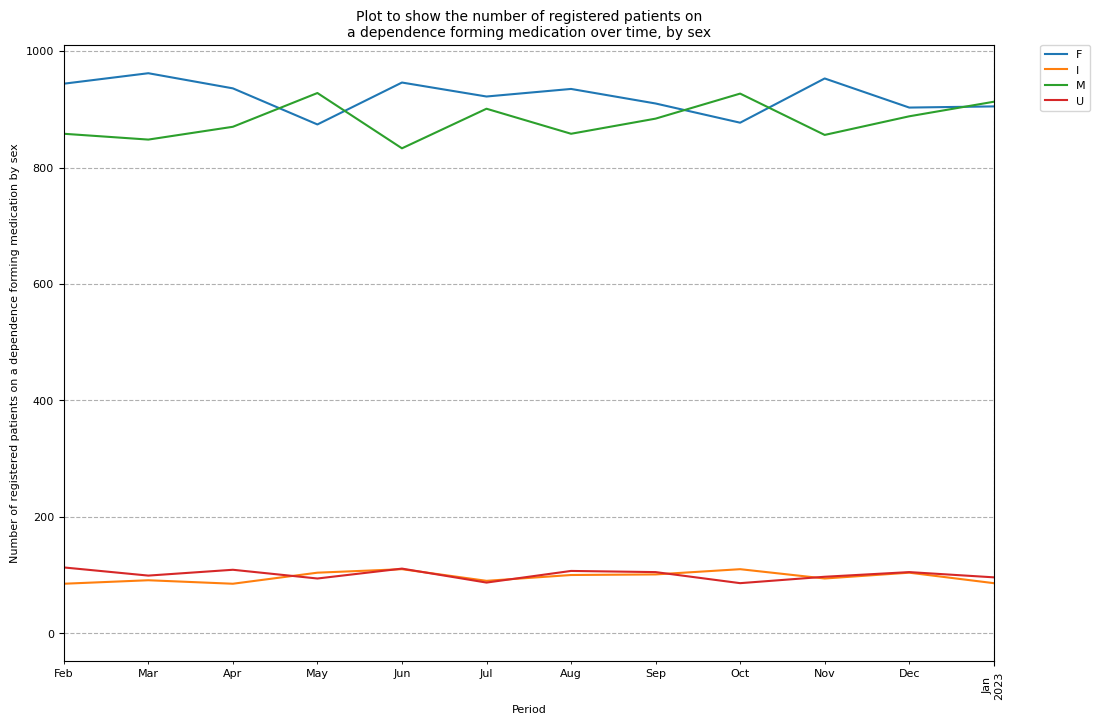

In [10]:
data_measure_social_prescribing_sex_rate = pd.read_csv("../output/measure_compare_medications_by_sex_socialrx_v_consultation_rate.csv", usecols=["date", "sex", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_social_prescribing_sex_rate = data_measure_social_prescribing_sex_rate.loc[data_measure_social_prescribing_sex_rate["with_social_prescribing"] == 1, :]
df = pd.DataFrame(data=data_measure_social_prescribing_sex_rate) 
df2 = df.groupby(['date', 'sex']).population.sum().unstack()

ax = df2.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients with social prescribing by sex', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients with social prescribing over time, by sex'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_sex_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()
